# Assignment 7 - kNN, Decision Tree, RandomForest

### <span style="color:red"> WRITE YOUR NAME HERE: </span>   Sena Nur Bilgin

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import  roc_curve, roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

**Loading the data set from Scikit-Learn**

In [18]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [19]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**Getting a description of the data set**

In [20]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [21]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [22]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [23]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


**To make the target encoding more obvious (we want to predict the risk of cancer), we invert the encoding values so that now 0 codes benign and 1 codes malignant**

In [24]:
target = target.replace({0:1, 1:0})
target.sample(n=8, random_state=1)

,tumor type
421,0
47,1
292,0
186,1
414,1
132,1
161,1
197,1


# Your turn

For this assinment, we will use two features: **mean radius** and **mean texture**.

## 0. Prepare your dataset
- You should end up with the following variables: X_train, X_val, X_test, y_train, y_val, y_test
- Don't forget to scale your features
- Use only the features mentioned above.

In [25]:

df_combined = pd.concat([features, target], axis=1)

X = df_combined[["mean radius", "mean texture"]]
y = df_combined['tumor type']  # No need for double brackets here

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)



Execute this cell to check that the shapes of your dataframes are correct.

In [26]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Val set:', X_val.shape,  y_val.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (319, 2) (319,)
Val set: (107, 2) (107,)
Test set: (143, 2) (143,)


## 1. a) Train a k-NN with k=5 and plot the decision areas based on that model.

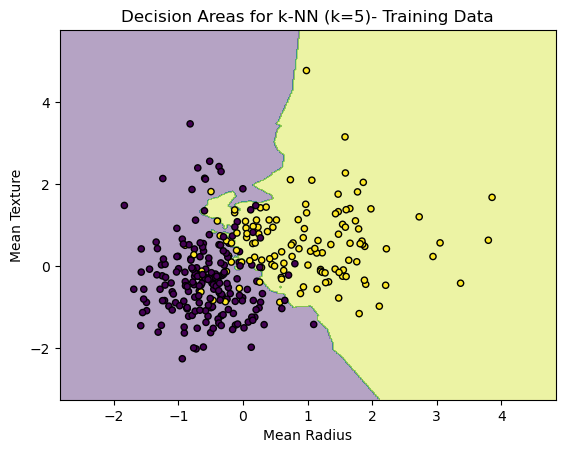

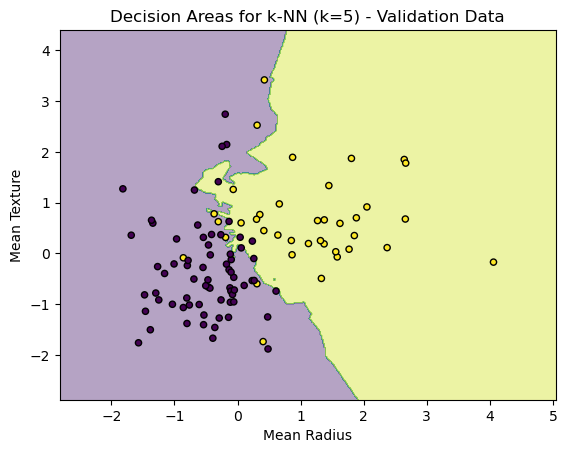

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

def plot_decision_areas(X, y, classifier, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('Mean Radius')
    plt.ylabel('Mean Texture')
    plt.show()

plot_decision_areas(X_train, y_train, knn, 'Decision Areas for k-NN (k=5)- Training Data')
plot_decision_areas(X_val, y_val, knn, 'Decision Areas for k-NN (k=5) - Validation Data')

y_pred_val = knn.predict(X_val)
y_pred_test = knn.predict(X_test)




You can use this function to plot the decision area

## b) Explore different values of k to determine an optimal value.
Make a graph to show your results and decide what value of k is optimal (No Grid Search yet)

k=1: Mean score: 0.824454365079365
k=2: Mean score: 0.8464285714285713
k=3: Mean score: 0.8713789682539682
k=4: Mean score: 0.8745535714285714
k=5: Mean score: 0.871329365079365
k=6: Mean score: 0.8776785714285713
k=7: Mean score: 0.8808531746031747
k=8: Mean score: 0.8871031746031747
k=9: Mean score: 0.8776785714285713
k=10: Mean score: 0.8902777777777778
k=11: Mean score: 0.8871031746031747
k=12: Mean score: 0.8934027777777779
k=13: Mean score: 0.8933531746031746
k=14: Mean score: 0.902827380952381
k=15: Mean score: 0.902827380952381
k=16: Mean score: 0.9027777777777779
k=17: Mean score: 0.9027777777777779
k=18: Mean score: 0.9027777777777779
k=19: Mean score: 0.899702380952381
k=20: Mean score: 0.9059523809523811
k=21: Mean score: 0.899702380952381
k=22: Mean score: 0.8996527777777779
k=23: Mean score: 0.8965277777777778
k=24: Mean score: 0.9027777777777779
k=25: Mean score: 0.8996527777777779
k=26: Mean score: 0.8996031746031747
k=27: Mean score: 0.8965277777777778
k=28: Mean score

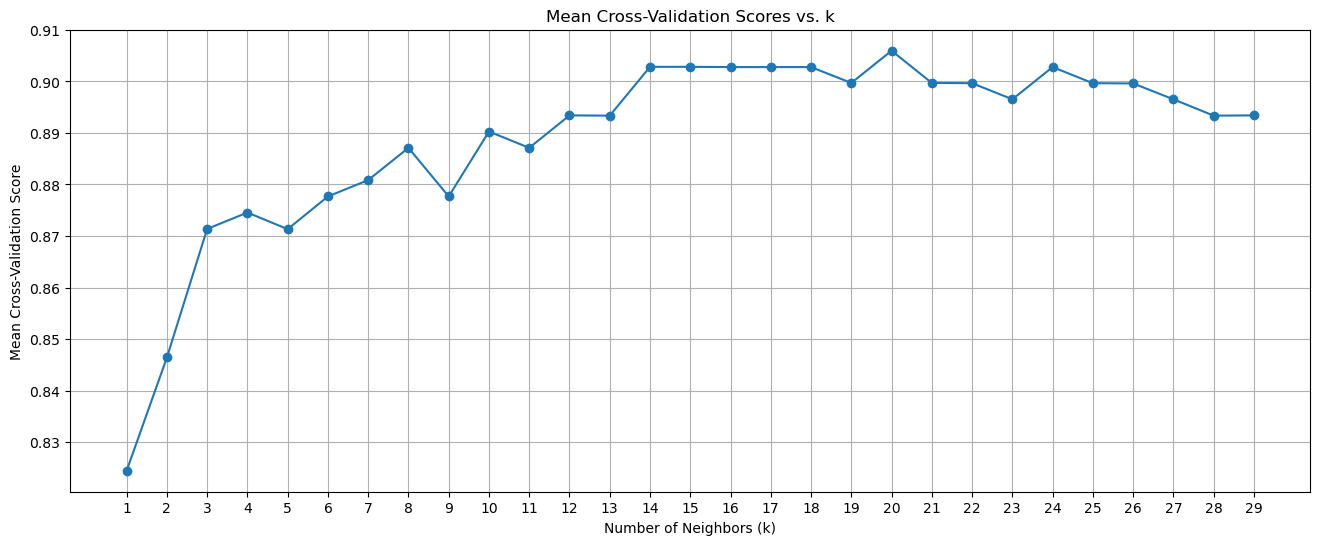

Highest mean score value of k: 20


In [28]:
k_values = list(range(1, 30))  # Explore k from 1 to 29
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation with accuracy scoring
    mean_score = np.mean(scores)
    mean_scores.append(mean_score)
    print(f"k={k}: Mean score: {mean_score}")

plt.figure(figsize=(16, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.title('Mean Cross-Validation Scores vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

optimal_k = k_values[np.argmax(mean_scores)]
print("Highest mean score value of k:", optimal_k)


What value of k do you choose and why?

- A higher k value can lead to a smoother decision boundary and potentially introduce underfitting, meaning the model may not capture the complexities of the data well enough. I 
want to select a slightly lower k value, such as 12 or 14, which still maintains a high mean cross-validation score while potentially reducing the risk of underfitting. 


Re-train your k-nn classifier with the optimal k

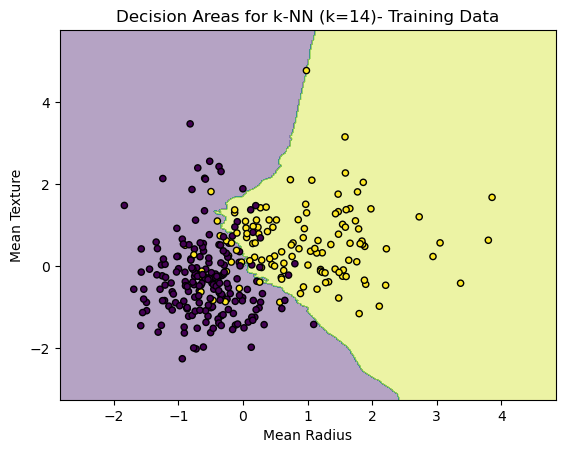

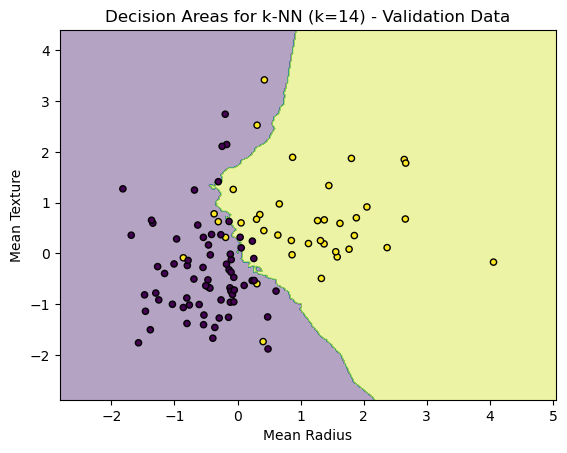

In [29]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
plot_decision_areas(X_train, y_train, knn, 'Decision Areas for k-NN (k=14)- Training Data')
plot_decision_areas(X_val, y_val, knn, 'Decision Areas for k-NN (k=14) - Validation Data')


## 2.a) Train a Decision Tree and plot the decision areas based on that model.


In [30]:

dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

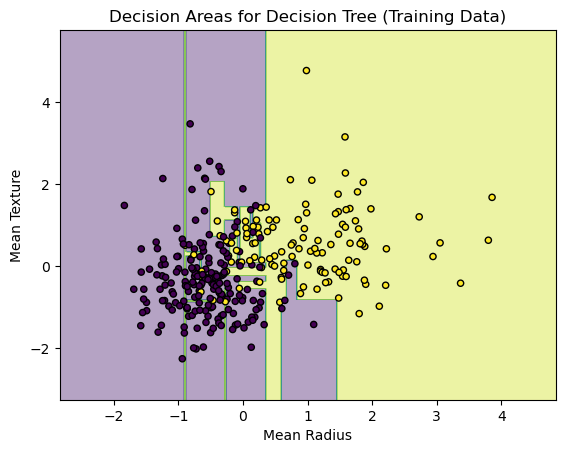

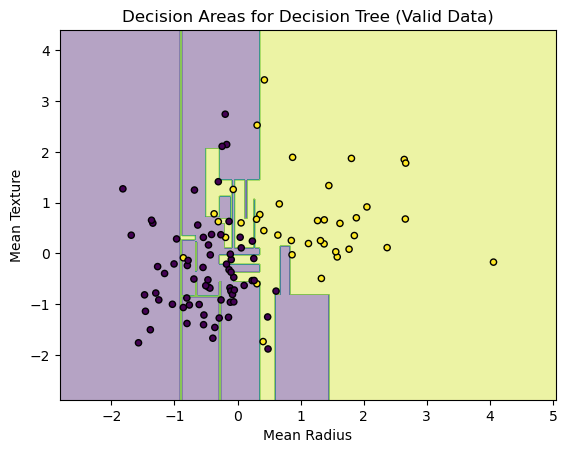

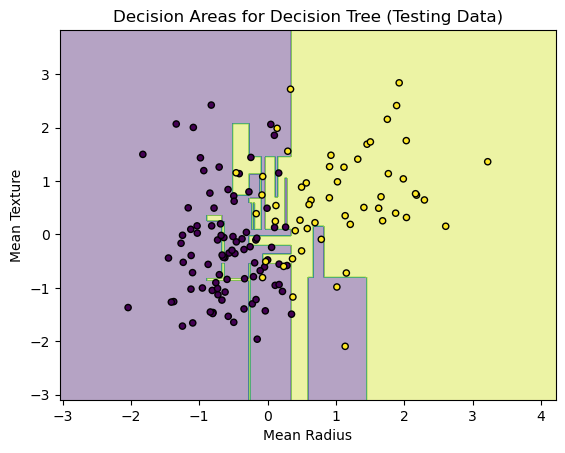

In [33]:

# Plot decision areas
plot_decision_areas(X_train, y_train, dt, 'Decision Areas for Decision Tree (Training Data)')
plot_decision_areas(X_val, y_val, dt, 'Decision Areas for Decision Tree (Valid Data)')
plot_decision_areas(X_test, y_test, dt, 'Decision Areas for Decision Tree (Testing Data)')



## b) What would be an optimal value for the depth of the Decision Tree?  
Try out many values and show your results in a graph (or use [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) if you want).  
Hint: you can use parameter max_depth of DecisionTreeClassifier.


depths=1: Mean score: 0.846577380952381
depths=2: Mean score: 0.849702380952381
depths=3: Mean score: 0.8747023809523811
depths=4: Mean score: 0.868452380952381
depths=5: Mean score: 0.8747023809523811
depths=6: Mean score: 0.8558531746031747
depths=7: Mean score: 0.8590773809523811
depths=8: Mean score: 0.8402281746031747
depths=9: Mean score: 0.8589781746031747
depths=10: Mean score: 0.8402281746031747
depths=11: Mean score: 0.8465277777777779
depths=12: Mean score: 0.8621527777777779
depths=13: Mean score: 0.8590277777777778
depths=14: Mean score: 0.8590277777777778
depths=15: Mean score: 0.8496527777777778
depths=16: Mean score: 0.8465277777777779
depths=17: Mean score: 0.8465277777777779
depths=18: Mean score: 0.8590277777777778
depths=19: Mean score: 0.8621527777777779
depths=20: Mean score: 0.8465277777777779


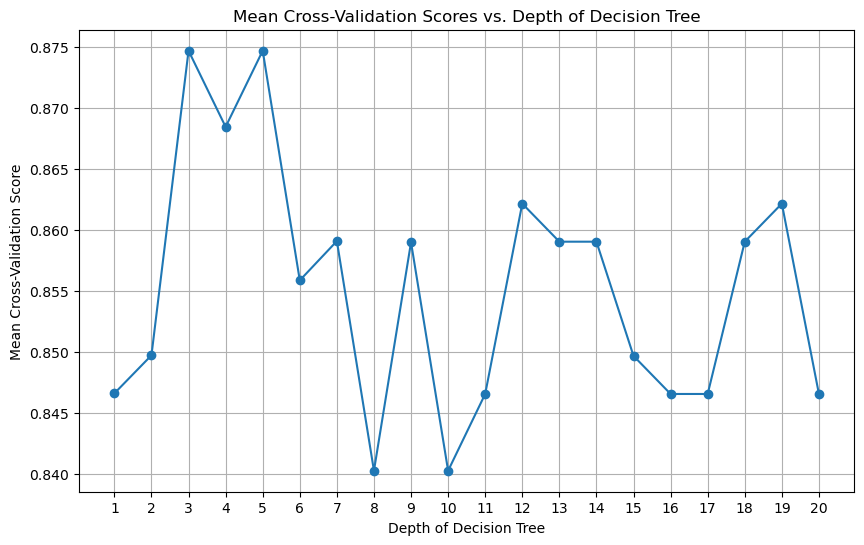

In [34]:

depths = range(1, 21)
mean_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    
    scores = cross_val_score(dt, X_train, y_train, cv=5,scoring='accuracy')
    mean_score = np.mean(scores)
    mean_scores.append(mean_score)
    print(f"depths={depth}: Mean score: {mean_score}")
    
plt.figure(figsize=(10, 6))
plt.plot(depths, mean_scores, marker='o')
plt.title('Mean Cross-Validation Scores vs. Depth of Decision Tree')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Mean Cross-Validation Score')
plt.xticks(depths)
plt.grid(True)
plt.show()


What depth do you choose and why?

- Considering these results, I would choose either depth 3  or 5 or depths . Depth 5 achieves a slightly higher mean score, indicating good performance without excessive complexity, while depths 3 are also strong contenders with slightly lower scores.

Fit your decision tree again on the training set with the optimal depth

In [35]:

optimal_depth = 3
dt_optimal = DecisionTreeClassifier(max_depth=optimal_depth,criterion = 'entropy')
dt_optimal.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

## 3. Train a Random Forest and plot the decision areas based on that model.


In [36]:
y_pred_tree2= dt_optimal.predict(X_test)
y_pred_tree_val2 = dt_optimal.predict(X_val)

In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 4. Train a Logistic Regression and plot the decision areas based on that model.


In [38]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

## 5. Train another classifier of your choice and plot the decision areas based on that model.


In [43]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(max_depth=3, random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)



xgb = XGBClassifier(colsample_bytree= 1, max_depth=5, n_estimators=300, learning_rate=0.01, random_state=42,subsample=0.8)
xgb.fit(X_train, y_train)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.6}
Best Score: 0.8935019841269842


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## 5 . Compare the performance between all that models.
For each model, compute:
- Accuracy
- Precision
- Recall
- AUC  
Your results should be displayed in a DataFrame, with the column names specifying the model used, and the row indexes specifying the metric. (The same as you did in the regression homework).

In [44]:
metrics = {
    'Random Forest': {
        'Accuracy': accuracy_score(y_val, rf.predict(X_val)),
        'Precision': precision_score(y_val, rf.predict(X_val)),
        'Recall': recall_score(y_val, rf.predict(X_val)),
        'AUC': roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1])
    },
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_val, log_reg.predict(X_val)),
        'Precision': precision_score(y_val, log_reg.predict(X_val)),
        'Recall': recall_score(y_val, log_reg.predict(X_val)),
        'AUC': roc_auc_score(y_val, log_reg.predict_proba(X_val)[:, 1])
    },
    'xgb': {
        'Accuracy': accuracy_score(y_val, xgb.predict(X_val)),
        'Precision': precision_score(y_val, xgb.predict(X_val)),
        'Recall': recall_score(y_val, xgb.predict(X_val)),
        'AUC': roc_auc_score(y_val, xgb.predict_proba(X_val)[:, 1])

    }
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

           Random Forest  Logistic Regression       xgb
Accuracy        0.906542             0.897196  0.906542
Precision       0.850000             0.864865  0.868421
Recall          0.894737             0.842105  0.868421
AUC             0.954805             0.951182  0.963387


### Display the ROC curves of your models (on the same graph for all models)

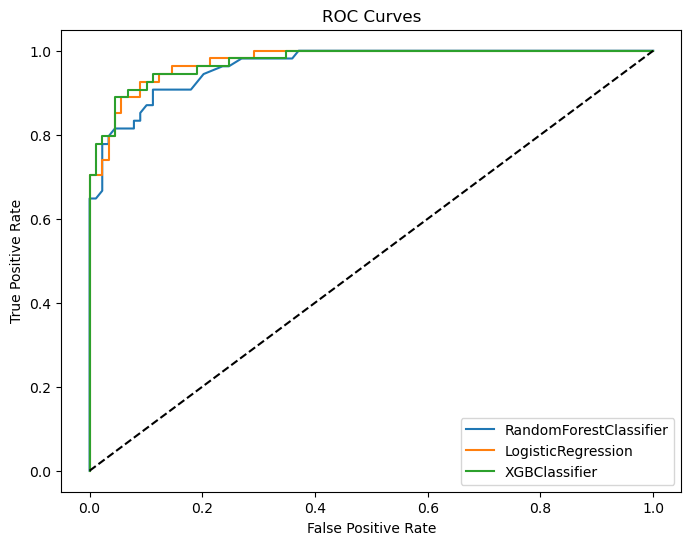

In [45]:
plt.figure(figsize=(8, 6))
for model in [rf, log_reg, xgb]:
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=model.__class__.__name__)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


## 6. Pick the best model and compute its generalization performance on the test set. 

Explain what model you choose, based on what metric, and explain your choice.

- Based on the provided metrics, it appears that the XGBoost (XGB) model has the highest accuracy, precision, recall, and AUC among the three models evaluated. Therefore, the XGBoost model can be considered the best performing model based on the validation set.



In [46]:

######### XGBoost model to make predictions on the test set
y_pred_test = xgb.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
print("Test Set Performance of XGBoost Model:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"AUC: {auc_test:.4f}")


Test Set Performance of XGBoost Model:
Accuracy: 0.9301
Precision: 0.9231
Recall: 0.8889
AUC: 0.9748
